In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [92]:
df = pd.read_excel('covid19_clinical_dataset.xlsx')
print(df.shape)

(5644, 111)


In [93]:
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
df.drop(columns='Patient ID',inplace=True)

In [95]:
df_null = pd.DataFrame(df.isnull().sum()).reset_index()
df_null.columns=['column_name','Count']
df_null.sort_values(by='Count',ascending=False)

,column_name,Count
26,Mycoplasma pneumoniae,5644
80,Urine - Sugar,5644
88,Partial thromboplastin time (PTT),5644
92,"Prothrombin time (PT), Activity",5644
98,D-Dimer,5644
...,...,...
1,SARS-Cov-2 exam result,0
4,Patient addmited to intensive care unit (1=yes...,0
3,Patient addmited to semi-intensive unit (1=yes...,0
2,"Patient addmited to regular ward (1=yes, 0=no)",0


# we can see few columns are completely null.we can drop those columns

In [96]:
df_null[df_null['Count'] == len(df)]

,column_name,Count
26,Mycoplasma pneumoniae,5644
80,Urine - Sugar,5644
88,Partial thromboplastin time (PTT),5644
92,"Prothrombin time (PT), Activity",5644
98,D-Dimer,5644


In [97]:
# we can drop all the columns whose 50 + percent of values are null
full_null_columns = df_null[df_null['Count'] == len(df)].column_name.to_list()
full_null_columns

['Mycoplasma pneumoniae',
 'Urine - Sugar',
 'Partial thromboplastin time\xa0(PTT)\xa0',
 'Prothrombin time (PT), Activity',
 'D-Dimer']

In [98]:
#df.drop(columns=full_null_columns,inplace=True)

In [99]:
df.shape

(5644, 110)

In [100]:
df

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,10,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
df.columns

Index(['Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=110)

In [102]:
df[df['SARS-Cov-2 exam result']=='positive']

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
67,7,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,16,positive,1,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,10,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
568,2,positive,0,0,0,0.991838,0.792188,-0.341548,1.469188,1.653476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
676,15,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5632,16,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5633,4,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5634,15,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5639,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
df[df['SARS-Cov-2 exam result']=='negative']

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,12,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5638,14,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,...,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.025978e+00,1.025978e+00,1.019049e+00
min,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,-1.865070e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,4.000000,0.000000,0.000000,0.000000,-5.188074e-01,-5.862439e-01,-6.053457e-01,-6.624832e-01,-5.679496e-01,-7.307069e-01,...,-1.122574e+00,-5.348102e-01,-3.308668e-01,-9.210583e-02,-5.117720e-01,-5.397211e-01,-8.169898e-01,-1.214975e-01,-5.527296e-01,-4.852787e-01
50%,9.000000,0.000000,0.000000,0.000000,5.340703e-02,4.031596e-02,-1.217160e-01,-1.015171e-01,1.385207e-02,-1.426696e-02,...,2.677689e-01,-2.120799e-01,-1.181667e-02,2.942021e-01,7.743482e-02,5.633191e-02,-1.599549e-01,-1.174366e-02,-1.381825e-01,1.826928e-01
75%,14.000000,0.000000,0.000000,0.000000,7.171751e-01,7.295320e-01,5.314981e-01,6.838353e-01,6.661759e-01,5.976919e-01,...,7.383496e-01,2.305214e-02,6.661649e-01,5.115003e-01,4.385609e-01,5.085100e-01,4.500090e-01,-1.174366e-02,2.763648e-01,5.937525e-01
max,19.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,3.764100e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


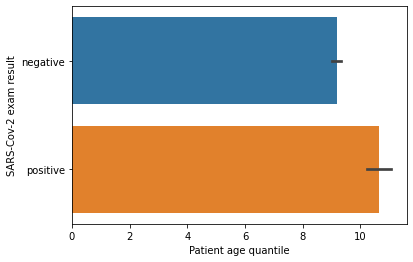

In [105]:
sns.barplot(x='Patient age quantile',y='SARS-Cov-2 exam result',data=df)

In [106]:
df['Patient age quantile'].max()

19

In [107]:
df.columns

Index(['Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=110)

In [108]:
df[df['Hb saturation (arterial blood gases)'].notnull()]

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
412,19,negative,0,0,1,1.106281,0.854844,-0.894267,1.020415,0.384090,...,0.738350,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,NaN,0.490988
1317,10,negative,1,0,0,-0.495919,-0.523588,0.374475,0.683835,-0.814774,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,NaN,-0.228366
1338,4,negative,0,0,0,-0.244145,0.040316,0.248857,0.235063,-0.144821,...,1.166148,-0.378055,-0.450511,0.101048,-0.606805,-0.642489,1.538530,-0.011744,NaN,0.696517
2528,19,negative,0,0,0,0.785841,0.416252,-1.158065,2.927700,-0.127191,...,-1.357863,-0.673123,0.825690,1.042674,0.191474,0.302975,-1.156294,-0.011744,NaN,0.799283
4535,12,positive,0,1,0,0.534067,0.416252,-0.944515,-0.325903,0.648545,...,0.481668,-0.147534,-0.370748,-0.140394,-0.416739,-0.436953,0.247995,NaN,NaN,0.902048
4910,13,negative,0,1,0,-0.587474,-0.523588,0.550341,1.469188,-0.515058,...,-0.373929,-0.341172,0.067946,0.294202,-0.378725,-0.354739,-0.528679,NaN,NaN,-0.228366
4926,19,negative,0,0,1,-3.265437,-3.593731,-0.153121,0.683835,-2.507288,...,0.995028,0.304289,1.703078,0.306274,1.940087,2.029471,0.216615,-0.450759,-1.480526,-2.900254
4933,19,negative,0,1,0,-0.267033,-1.087492,-0.316424,2.478927,-0.109560,...,-1.400642,0.931307,0.626284,-0.683640,1.369887,1.371759,-0.418846,-0.011744,NaN,-0.331131
5009,15,positive,0,1,0,-0.427254,-0.022340,-1.107818,-0.550290,-0.250603,...,-1.443424,-0.359614,0.666165,0.571861,0.039421,0.097439,-1.054307,NaN,NaN,-0.844956
5010,4,negative,0,0,0,0.030518,-0.084996,-1.321369,2.030154,-0.074299,...,0.738350,-0.073767,0.506640,0.197625,0.381541,0.426296,0.675558,NaN,NaN,0.490988


In [109]:
df[df['Phosphor'].notnull()]

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
8,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730393,NaN
294,3,negative,0,0,0,-1.823456,-1.902020,0.248857,1.132609,-1.608140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.454028,NaN
334,7,negative,0,0,0,1.266501,1.168124,-0.190806,0.908221,0.824849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.611951,NaN
730,18,negative,0,0,0,-0.495919,-0.523588,1.253802,0.010677,-0.426907,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.177663,NaN
865,1,negative,0,0,1,-0.129702,-0.147652,0.600588,-1.447836,0.701437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.993775,NaN
928,19,negative,0,1,0,-0.358588,-0.147652,-0.215930,-0.550290,-0.902926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.454028,NaN
1179,19,negative,0,1,0,-0.885025,-0.836868,-0.454604,-0.213711,-0.991078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.217144,NaN
1221,18,negative,0,0,0,0.694287,0.980156,0.273981,0.683835,0.119635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.769873,NaN
1260,16,negative,0,0,0,-0.564585,-0.398276,0.902071,1.917961,-0.955817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.059221,NaN
1388,10,negative,0,0,0,-0.106813,0.165628,0.512655,1.132609,-0.285863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.454028,NaN


In [110]:
df[df['ctO2 (arterial blood gas analysis)'].notnull()]

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
412,19,negative,0,0,1,1.106281,0.854844,-0.894267,1.020415,0.384090,...,0.738350,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,NaN,0.490988
1317,10,negative,1,0,0,-0.495919,-0.523588,0.374475,0.683835,-0.814774,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,NaN,-0.228366
1338,4,negative,0,0,0,-0.244145,0.040316,0.248857,0.235063,-0.144821,...,1.166148,-0.378055,-0.450511,0.101048,-0.606805,-0.642489,1.538530,-0.011744,NaN,0.696517
2528,19,negative,0,0,0,0.785841,0.416252,-1.158065,2.927700,-0.127191,...,-1.357863,-0.673123,0.825690,1.042674,0.191474,0.302975,-1.156294,-0.011744,NaN,0.799283
4535,12,positive,0,1,0,0.534067,0.416252,-0.944515,-0.325903,0.648545,...,0.481668,-0.147534,-0.370748,-0.140394,-0.416739,-0.436953,0.247995,NaN,NaN,0.902048
4910,13,negative,0,1,0,-0.587474,-0.523588,0.550341,1.469188,-0.515058,...,-0.373929,-0.341172,0.067946,0.294202,-0.378725,-0.354739,-0.528679,NaN,NaN,-0.228366
4926,19,negative,0,0,1,-3.265437,-3.593731,-0.153121,0.683835,-2.507288,...,0.995028,0.304289,1.703078,0.306274,1.940087,2.029471,0.216615,-0.450759,-1.480526,-2.900254
4933,19,negative,0,1,0,-0.267033,-1.087492,-0.316424,2.478927,-0.109560,...,-1.400642,0.931307,0.626284,-0.683640,1.369887,1.371759,-0.418846,-0.011744,NaN,-0.331131
5009,15,positive,0,1,0,-0.427254,-0.022340,-1.107818,-0.550290,-0.250603,...,-1.443424,-0.359614,0.666165,0.571861,0.039421,0.097439,-1.054307,NaN,NaN,-0.844956
5010,4,negative,0,0,0,0.030518,-0.084996,-1.321369,2.030154,-0.074299,...,0.738350,-0.073767,0.506640,0.197625,0.381541,0.426296,0.675558,NaN,NaN,0.490988


In [111]:
# we can drop all the columns whose 50 + percent of values are null
avg_null_columns = df_null[df_null['Count'] >= len(df)/2].column_name.to_list()
avg_null_columns

['Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Serum Glucose',
 'Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Mycoplasma pneumoniae',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Neutrophils',
 'Urea',
 'Proteina C reativa mg/dL',
 'Creatinine',
 'Potassium',
 'Sodium',
 'Influenza B, rapid test',
 'Influenza A, rapid test',
 'Alanine transaminase',
 'Aspartate transaminase',
 'Gamma-glutamyltransferase\xa0',
 'Total Bilirubin',
 '

In [112]:
avg_null_columns

['Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Serum Glucose',
 'Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Mycoplasma pneumoniae',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Neutrophils',
 'Urea',
 'Proteina C reativa mg/dL',
 'Creatinine',
 'Potassium',
 'Sodium',
 'Influenza B, rapid test',
 'Influenza A, rapid test',
 'Alanine transaminase',
 'Aspartate transaminase',
 'Gamma-glutamyltransferase\xa0',
 'Total Bilirubin',
 '

In [113]:
df2 = df.copy()

In [114]:
df2.drop(columns=avg_null_columns,inplace=True,axis=1)

In [115]:
df2.columns

Index(['Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)'],
      dtype='object')

# Nothing to predict Here. As most of the coumns are only NULL values